In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,NaN
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,NaN
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,0.70388,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	800


In [4]:
df.describe()

,column 1,column 2
count,4000.000000,3200.000000
mean,0.006711,0.009718
std,0.726242,0.768244
min,-1.714600,-1.376500
25%,-0.500103,-0.701190
50%,0.013352,0.013378
75%,0.553305,0.721365
max,1.363900,1.344400


<AxesSubplot:>

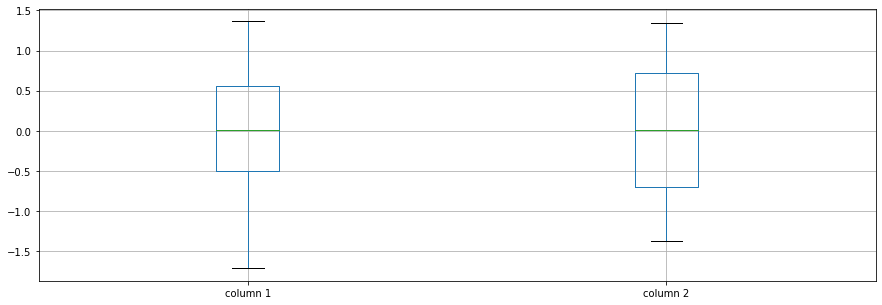

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.006711
column 2    0.009718
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,-0.008562
column 2,-0.008562,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [2,2+34,2+34+34,2+34+34+34,2+34+34+34+34,2+34+34+34+34+34,2+34+34+34+34,2+34+34+34,2+34+34,2+34,2], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.3304663190841675
Epoch: 1 , loss: 1.3296241612434387
Epoch: 2 , loss: 1.3287191152572633
Epoch: 3 , loss: 1.329256492614746
Epoch: 4 , loss: 1.3304459195137024
Epoch: 5 , loss: 1.3299941365718841
Epoch: 6 , loss: 1.3305725197792053
Epoch: 7 , loss: 1.3287074308395386
Epoch: 8 , loss: 1.329751314163208
Epoch: 9 , loss: 1.3312339324951172
Epoch: 10 , loss: 1.3300955436229707
Epoch: 11 , loss: 1.3295658726692199
Epoch: 12 , loss: 1.3311049036979676
Epoch: 13 , loss: 1.3292424302101136
Epoch: 14 , loss: 1.3309061279296874
Epoch: 15 , loss: 1.3304891881942749
Epoch: 16 , loss: 1.3305230927467346
Epoch: 17 , loss: 1.3291629395484925
Epoch: 18 , loss: 1.3304485092163085
Epoch: 19 , loss: 1.3299711198806763
Epoch: 20 , loss: 1.3293558993339538
Epoch: 21 , loss: 1.3298329133987428
Epoch: 22 , loss: 1.3286632866859436
Epoch: 23 , loss: 1.3302406368255615
Epoch: 24 , loss: 1.330093134880066
Epoch: 25 , loss: 1.3

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -1.258200
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2
0,0.0,1.241964
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
3995,0.0,-0.271266
3996,0.0,0.000000
3997,0.0,0.000000
3998,0.0,-0.344656


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(14.79486846193966, 64.9340549279942)

In [17]:
NRMS=numerator/denominator
NRMS


0.22784451823231722

In [18]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2
0,-0.45866,0.006764
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.006764
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,0.70388,0.006764


In [20]:
imputations[-1].to_excel("CNP_AN_10(imp).xlsx", index=False, header=False)